In [50]:
import pandas as pd
df=pd.read_csv('StudentsPerformance.csv')
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
99,female,group D,bachelor's degree,standard,none,65,67,62
768,female,group D,some high school,standard,none,68,71,75
405,female,group C,some high school,standard,none,63,73,68
559,male,group D,some high school,standard,none,73,66,62
490,female,group A,associate's degree,free/reduced,none,65,85,76


#LOADING DATASET AND LOOKING FOR INFORMATION

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#Checking for Null values

In [52]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# ADDING NEW COLS : TOTAL  SCORE & AVG SCORE

In [53]:
df['Total_Score']=df['math score']+df['reading score']+df['writing score']
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [54]:
df['avg_score']=df['Total_Score']/3
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


#RANK

In [55]:
df['rank']=df['Total_Score'].rank(ascending=False,method='dense').astype(int)
df.sample(5).shape

(5, 11)

In [56]:
df['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [57]:

df.groupby('race/ethnicity')['Total_Score'].mean()

race/ethnicity
group A    188.977528
group B    196.405263
group C    201.394984
group D    207.538168
group E    218.257143
Name: Total_Score, dtype: float64

In [58]:
df.groupby('lunch')['Total_Score'].mean()

lunch
free/reduced    186.597183
standard        212.511628
Name: Total_Score, dtype: float64

In [59]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Score,avg_score,rank
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,76
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,47
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,16
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,146
4,male,group C,some college,standard,none,76,78,75,229,76.333333,65
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000,12
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333,122
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000,99
998,female,group D,some college,standard,completed,68,78,77,223,74.333333,71


In [60]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline

Encoding Steps

In [61]:
onehot_cols = ['gender','race/ethnicity','lunch']
ordinal_cols = ['parental level of education', 'test preparation course']

In [62]:
edu_level = [
    "some high school","high school","some college","associate's degree","bachelor's degree","master's degree"
]

prep_order = ["none", "completed"]

#COLUMN TRANSFORMER


In [63]:
transformer = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(drop="first"),onehot_cols),
        ("edu_ordinal", OrdinalEncoder(categories=[edu_level]), ['parental level of education']),
        ("prep_ordinal", OrdinalEncoder(categories=[prep_order]), ['test preparation course']),
    ]
)
pipeline = Pipeline(steps=[("transformer", transformer)])

#Embedding columns

In [64]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=['avg_score','Total_Score','rank','math score'])
y = df['avg_score']


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Fit the pipeline on the training data
pipeline.fit(x_train, y_train)

# Get feature names from one-hot
onehot_features = pipeline.named_steps['transformer'].named_transformers_['onehot'].get_feature_names_out(onehot_cols)

# Ordinal + numeric columns (they keep original names)
edu_features = ['parental level of education']
prep_features = ['test preparation course']


# Combine all column names
all_features = list(onehot_features) + edu_features + prep_features 

In [66]:
X_train_transformed = pipeline.transform(x_train)
X_test_transformed = pipeline.transform(x_test)


X_train_df = pd.DataFrame(X_train_transformed, columns=all_features)
X_test_df  = pd.DataFrame(X_test_transformed, columns=all_features)

print(X_train_df.head())

   gender_male  race/ethnicity_group B  race/ethnicity_group C  \
0          0.0                     0.0                     0.0   
1          0.0                     0.0                     1.0   
2          0.0                     0.0                     0.0   
3          1.0                     0.0                     1.0   
4          1.0                     0.0                     0.0   

   race/ethnicity_group D  race/ethnicity_group E  lunch_standard  \
0                     1.0                     0.0             1.0   
1                     0.0                     0.0             0.0   
2                     1.0                     0.0             0.0   
3                     0.0                     0.0             0.0   
4                     0.0                     1.0             1.0   

   parental level of education  test preparation course  
0                          5.0                      0.0  
1                          4.0                      1.0  
2             

#BASIC STATISTICS

Relation between gender

gender
female    518
male      482
Name: count, dtype: int64

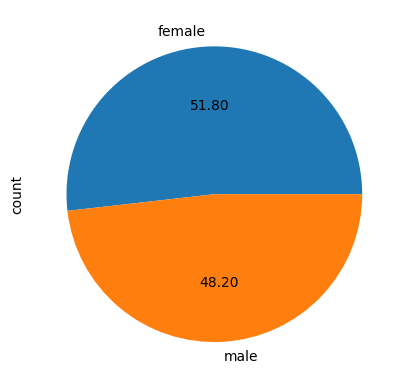

In [67]:
df['gender'].value_counts().plot(kind='pie',autopct='%.2f')
df['gender'].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

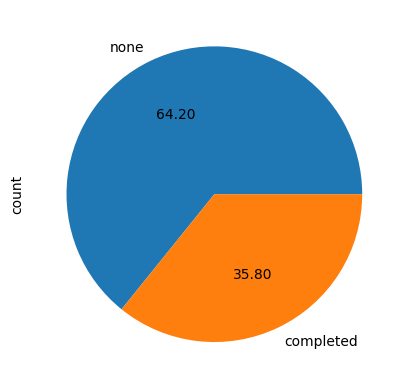

In [68]:
df['test preparation course'].value_counts().plot(kind='pie',autopct='%.2f')
df['test preparation course'].value_counts()

<Axes: ylabel='avg_score'>

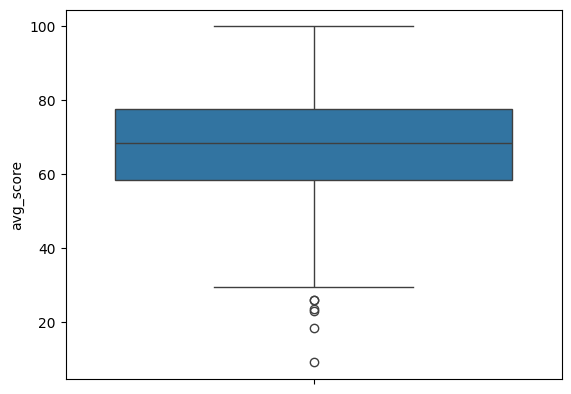

In [69]:
import seaborn as sns
sns.boxplot(df['avg_score'])

<Axes: ylabel='Total_Score'>

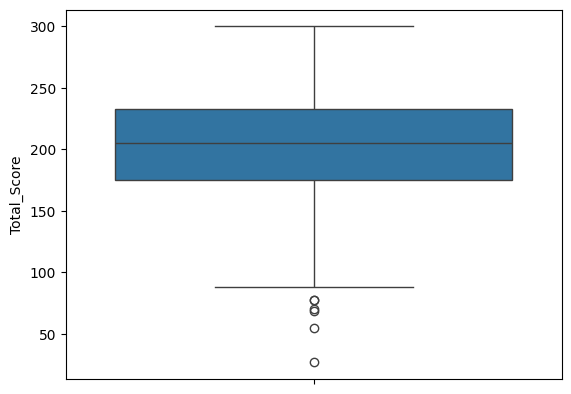

In [70]:
sns.boxplot(df['Total_Score'])

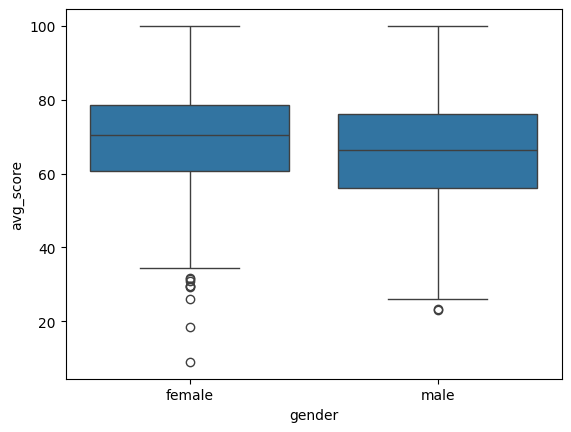

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x="gender", y="avg_score", data=df)

plt.show()

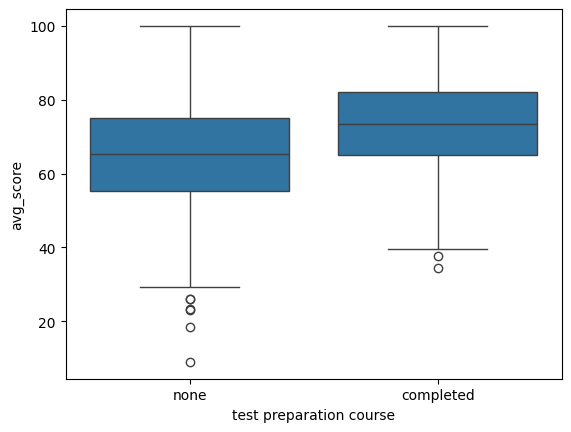

In [72]:
sns.boxplot(x="test preparation course", y="avg_score", data=df)
plt.show()

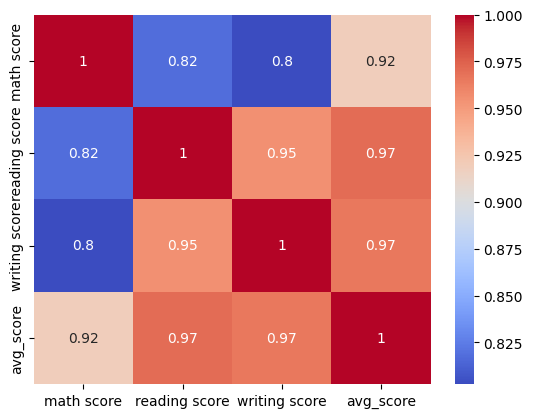

In [73]:
corr = df[['math score','reading score','writing score','avg_score']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

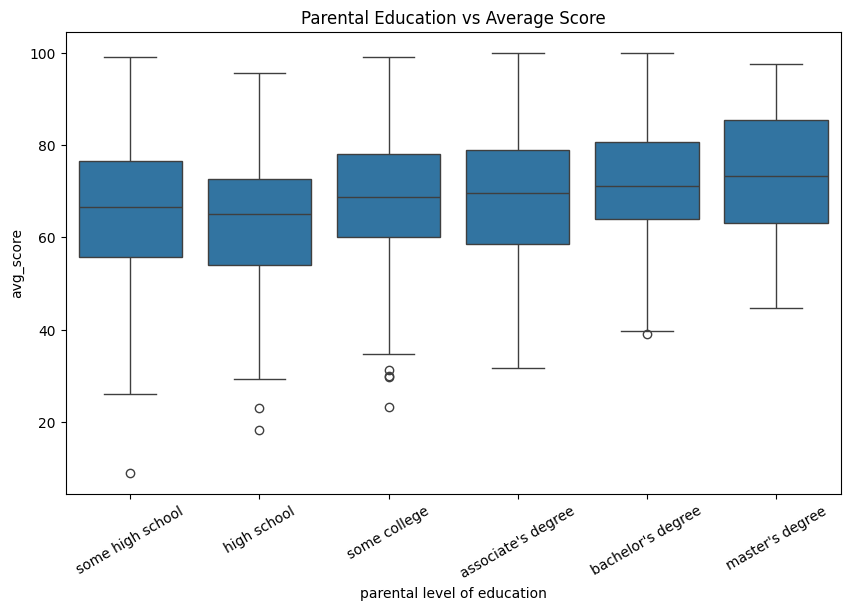

C:\Users\chauh\AppData\Local\Temp\ipykernel_16896\1401171578.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="parental level of education", y="avg_score", data=df, order=edu_order, estimator="mean", ci=None)


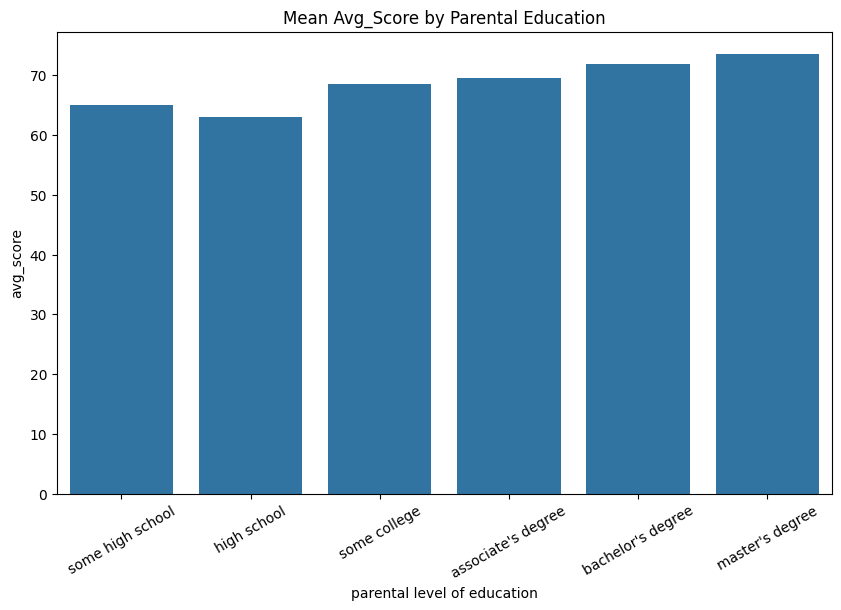

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the order for parental education
edu_order = [
    "some high school",
    "high school",
    "some college",
    "associate's degree",
    "bachelor's degree",
    "master's degree"
]

# Plot boxplot to see distribution
plt.figure(figsize=(10,6))
sns.boxplot(x="parental level of education", y="avg_score", data=df, order=edu_order)
plt.xticks(rotation=30)
plt.title("Parental Education vs Average Score")
plt.show()

# Optional: Plot barplot (mean values only)
plt.figure(figsize=(10,6))
sns.barplot(x="parental level of education", y="avg_score", data=df, order=edu_order, estimator="mean", ci=None)
plt.xticks(rotation=30)
plt.title("Mean Avg_Score by Parental Education")
plt.show()

#MODEL TRAINING

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [75]:
x=df.drop(columns=['avg_score','Total_Score','math score'])
y=df['avg_score']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#LINEAR REGRESSION

In [76]:
model=Pipeline(steps=[('transformer',transformer),('regressor',LinearRegression())])
model.fit(x_train,y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('transformer', ...), ('regressor', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('onehot', ...), ('edu_ordinal', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the differ

#PREDICTION STEP

In [77]:
y_pred=model.predict(x_test)

#MODEL ANALYSIS

In [84]:
print("R^2 Score :", r2_score(y_test,y_pred))
print("MSE :", mean_squared_error(y_test,y_pred))

R^2 Score : 0.1775513554994268
MSE : 176.3054921812418


In [85]:
from sklearn.tree import DecisionTreeRegressor

tree_model = Pipeline(steps=[("transformer", transformer), ("regressor", DecisionTreeRegressor(max_depth=3))])
tree_model.fit(x_train, y_train)
y_pred_tree = tree_model.predict(x_test)

from sklearn.metrics import r2_score, mean_squared_error
print("Decision Tree R²:", r2_score(y_test, y_pred_tree))
print("Decision Tree MSE:", mean_squared_error(y_test, y_pred_tree))

Decision Tree R²: 0.14081852179742993
Decision Tree MSE: 184.17978362587647


#CROSS VALIDATION

R²: 0.23831153865252575
MSE: 154.67460798753453
RMSE: 12.436824674631968
MAE: 10.018185436453575
Cross-validated R² scores: [0.26954735 0.24952825 0.1830172  0.14502541 0.22780029]
Mean CV R²: 0.21498370115416865


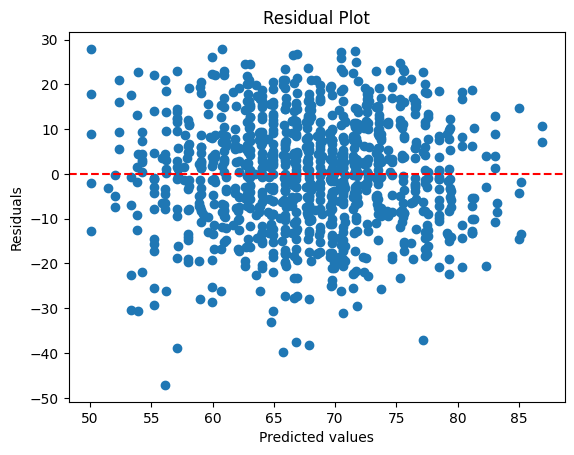

In [86]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Assume X contains your features (math score + demographics)
# and y is your target variable

# Apply the full pipeline including preprocessing and scaling
X_processed = pipeline.fit_transform(X)

# 2️⃣ Train linear regression
lr = LinearRegression()
lr.fit(X_processed, y)
pred = lr.predict(X_processed)

# 3️⃣ Evaluate metrics
mse = mean_squared_error(y, pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, pred)
r2 = lr.score(X_processed, y)

print("R²:", r2)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

# 4️⃣ Cross-validation (5 folds)
cv_scores = cross_val_score(lr, X_processed, y, cv=5, scoring='r2')
print("Cross-validated R² scores:", cv_scores)
print("Mean CV R²:", np.mean(cv_scores))

# 5️⃣ Residual plot
residuals = y - pred
plt.scatter(pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [87]:
import joblib

joblib.dump(model, "student_model.pkl")



['student_model.pkl']